In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols



#### Make a scatterplot of y=TotalPrice against x=Carat. 

In [3]:
dim = pd.read_csv("Diamonds.csv")
dim.head()


,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
0,1.08,E,VS1,68.6,6693.3,7228.8
1,0.31,F,VVS1,61.9,3159.0,979.3
2,0.31,H,VS1,62.1,1755.0,544.1
3,0.32,F,VVS1,60.8,3159.0,1010.9
4,0.33,D,IF,60.8,4758.8,1570.4


In [4]:
dim.shape

(351, 6)

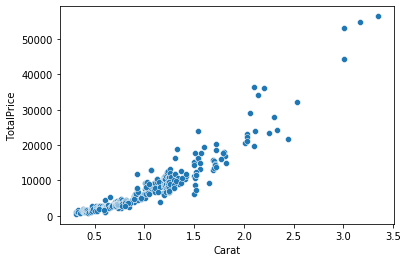

In [5]:
sns.scatterplot(x="Carat", y="TotalPrice", data=dim)


**Analysis**: In the above graph, the scatter plots show a linear pattern and we can see that the distribtuion of points in the plot and shows a strong correlation between PricePerCt and Carat. However, we notice a strong correltation from 0 to approx 1.7 in Carat, then we see some bouncing and jumping values from 2.0 to 3.5. We can conclde the bigger the Carat, the higher the TotalPrice.

#### Make a simple linear regression of Total Price as a function of Carat. 



In [7]:
Rmod = ols(formula='TotalPrice ~ Carat', data=dim)
Rres = Rmod.fit()
Rres.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2204.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          7.20e-153
Time:                        02:04:59   Log-Likelihood:                -3293.1
No. Observations:                 351   AIC:                             6590.
Df Residuals:                     349   BIC:                             6598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7181.2981    347.537    -20.663      0.000   -7864.828   -6497.769
Carat       1.464e+04    311.815     46.946      0.000     1.4e+04    1.53e+04
==============================================================================
Omnibus:                      159.724   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1205.436
Skew:                           1.734   Prob(JB):                    1.75e-262
Kurtosis:                      11.390   Cond. No.                         4.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

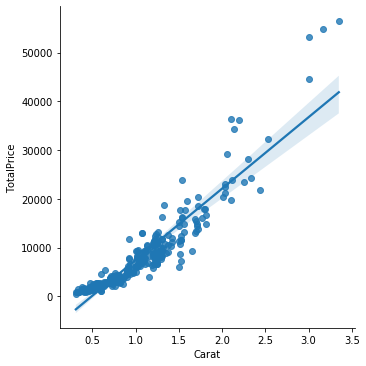

In [8]:
sns.lmplot(x="Carat", y="TotalPrice", data=dim)


**Analysis**: This linear regression shows a good model since R-squared is 0.863 and that tells us how strong the model is and how close the points variation around the mean which is highly correlated. Also, the slope of Carat is 1.46 and that illustrate the increasing upward in our linear model. 


Build a multiple regression model to predict the TotalPrice using Carat and Carat-squared. 
Now plot the Fitted versus Residuals and comment. 

Would a cubic term like Carat^3 improve the model?

In [9]:
dim['CaratSq']=dim['Carat']**2
dim['CaratCu']=dim['Carat']**3


In [10]:
dim.head()


,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice,CaratSq,CaratCu
0,1.08,E,VS1,68.6,6693.3,7228.8,1.1664,1.259712
1,0.31,F,VVS1,61.9,3159.0,979.3,0.0961,0.029791
2,0.31,H,VS1,62.1,1755.0,544.1,0.0961,0.029791
3,0.32,F,VVS1,60.8,3159.0,1010.9,0.1024,0.032768
4,0.33,D,IF,60.8,4758.8,1570.4,0.1089,0.035937


In [11]:
Rmod = ols(formula='TotalPrice ~ Carat+CaratSq', data=dim)
ResSq = Rmod.fit()
ResSq.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2168.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          3.43e-197
Time:                        02:05:45   Log-Likelihood:                -3186.0
No. Observations:                 351   AIC:                             6378.
Df Residuals:                     348   BIC:                             6390.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -522.7021    466.292     -1.121      0.263   -1439.807     394.403
Carat       2385.9862    752.545      3.171      0.002     905.878    3866.094
CaratSq     4498.2062    263.039     17.101      0.000    3980.860    5015.553
==============================================================================
Omnibus:                      125.710   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.009
Skew:                           1.214   Prob(JB):                    6.37e-254
Kurtosis:                      11.592   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** It clearly shows that by adding CaratSq to our Multiple Regression Model indicte strong predictor to TotalPrice since R-squared has increased from 0.863 to 0.926 and that shows more correlation. Also, we can see how t test of CaratSq contributed to the model by 17.1 which proof our analysis.

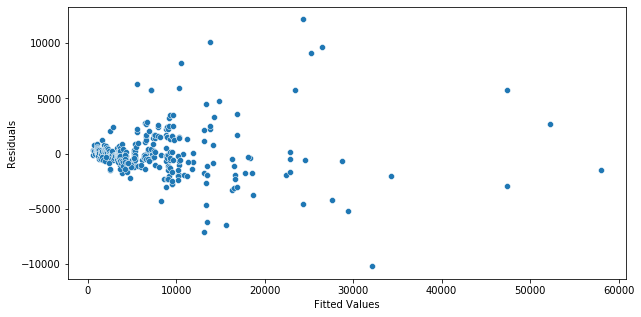

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x=ResSq.fittedvalues,y=ResSq.resid)
ax.set(xlabel='Fitted Values',ylabel='Residuals')
plt.show()

### Adding CaratCu our Multiple Regression

In [13]:
Rmod = ols(formula='TotalPrice ~ Carat+CaratSq+CaratCu', data=dim)
ResCu = Rmod.fit()
ResCu.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1442.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          1.74e-195
Time:                        02:05:51   Log-Likelihood:                -3186.0
No. Observations:                 351   AIC:                             6380.
Df Residuals:                     347   BIC:                             6395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -723.4418    875.505     -0.826      0.409   -2445.405     998.522
Carat       2942.0162   2185.437      1.346      0.179   -1356.353    7240.385
CaratSq     4077.6489   1573.798      2.591      0.010     982.264    7173.034
CaratCu       87.9222    324.380      0.271      0.787    -550.076     725.920
==============================================================================
Omnibus:                      128.561   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1193.486
Skew:                           1.250   Prob(JB):                    6.88e-260
Kurtosis:                      11.681   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

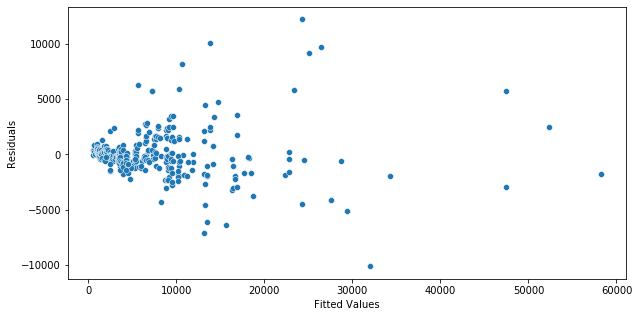

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x=ResCu.fittedvalues,y=ResCu.resid)
ax.set(xlabel='Fitted Values',ylabel='Residuals')
plt.show()

**Analysis** When added a thrid variable to our Multiple Regression, we did not see any changes. Therefore, the model has no change in R-squared compared to our analysis for CaratSq. Also, the t test of CaratCu has no contribution to the model. 


Try building models for TotalPrice using other variables besides Carat in the data frame.  What model do you think is best? Why? 

Our initial observation is we try to look for a pattern by ploting all variables against each other

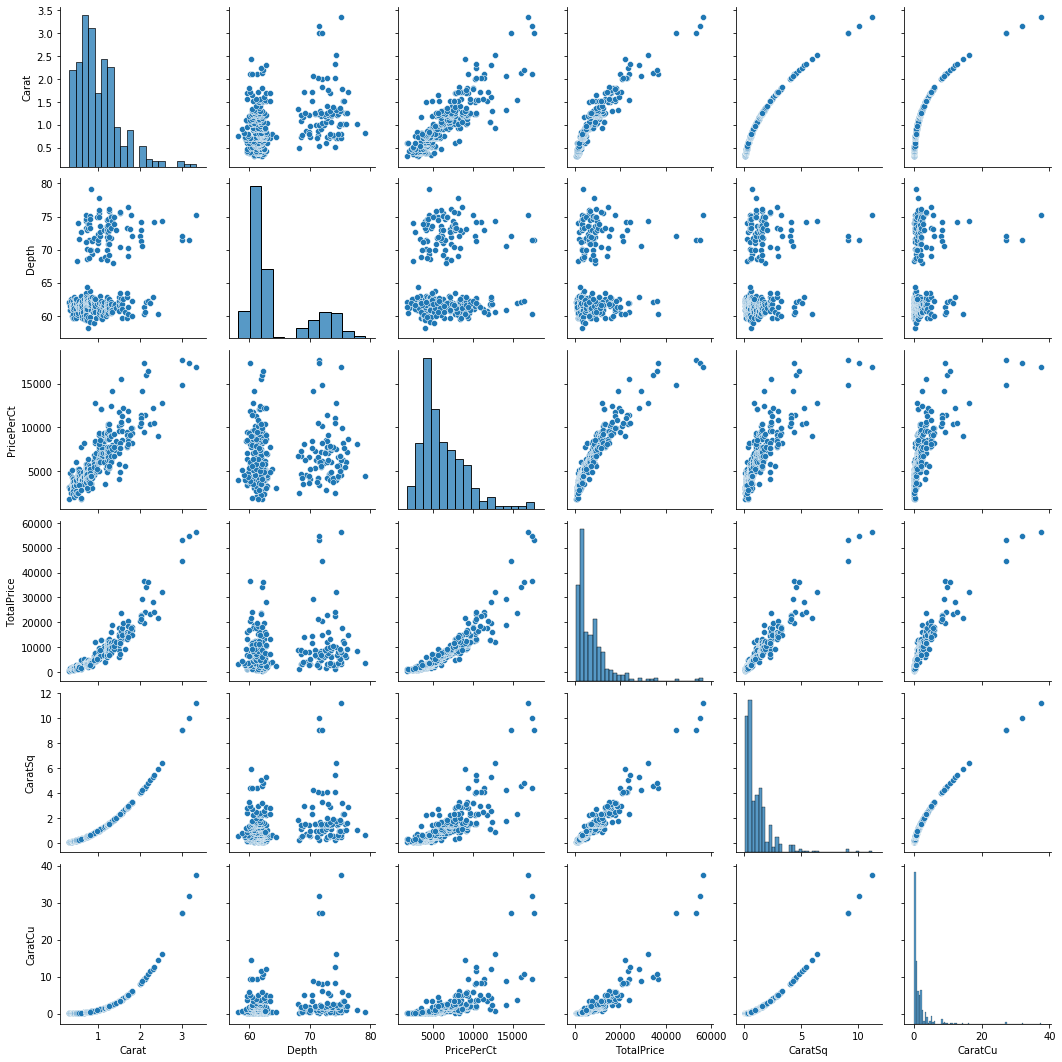

In [15]:
sns.pairplot(dim)

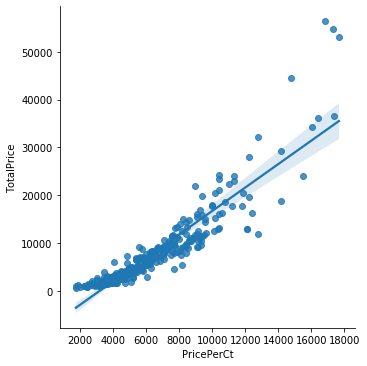

In [20]:
sns.lmplot(x="PricePerCt", y='TotalPrice', data=dim)

In [21]:
Rmod = ols(formula='TotalPrice ~ PricePerCt', data=dim)
ResP = Rmod.fit()
ResP.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          1.13e-138
Time:                        02:06:33   Log-Likelihood:                -3325.9
No. Observations:                 351   AIC:                             6656.
Df Residuals:                     349   BIC:                             6664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7880.2801    401.800    -19.612      0.000   -8670.535   -7090.025
PricePerCt     2.4558      0.058     42.048      0.000       2.341       2.571
==============================================================================
Omnibus:                      229.305   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4340.911
Skew:                           2.379   Prob(JB):                         0.00
Kurtosis:                      19.558   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
dim.corr()

,Carat,Depth,PricePerCt,TotalPrice,CaratSq,CaratCu
Carat,1.000000,0.320269,0.849065,0.929136,0.952073,0.844861
Depth,0.320269,1.000000,0.121979,0.217784,0.289583,0.254807
PricePerCt,0.849065,0.121979,1.000000,0.913863,0.797206,0.698485
TotalPrice,0.929136,0.217784,0.913863,1.000000,0.961026,0.917125
CaratSq,0.952073,0.289583,0.797206,0.961026,1.000000,0.965698
CaratCu,0.844861,0.254807,0.698485,0.917125,0.965698,1.000000


In [23]:
Rmod = ols(formula='TotalPrice ~ PricePerCt+Depth', data=dim)
resDP = Rmod.fit()
resDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     960.4
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          2.11e-142
Time:                        02:06:36   Log-Likelihood:                -3313.3
No. Observations:                 351   AIC:                             6633.
Df Residuals:                     348   BIC:                             6644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.821e+04   2060.759     -8.835      0.000   -2.23e+04   -1.42e+04
PricePerCt     2.4205      0.057     42.582      0.000       2.309       2.532
Depth        163.7963     32.104      5.102      0.000     100.653     226.939
==============================================================================
Omnibus:                      224.714   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3740.119
Skew:                           2.360   Prob(JB):                         0.00
Kurtosis:                      18.279   Cond. No.                     8.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis**: We can find other predictor variables of TotalPrice from PricePerCt and Depth. PricePerCt is a strong predictor to TotalPrice and it has a good single variable linear regression with R-Squared 0.835. and if we want to enhance the model by adding multiple Regression Model, we add PricePerCt + Depth as function of TotalPrice. The result is R-Squared is 0.847 and this seams very good model and increased slightly. The model tells us that there is strong correlation in PricePerCt and Depth as function of TotalPrice. However, Depth by itsself has no correlation with TotalPrice and we can state the nonlinearity, but by joining Depth with PricePerCt, it contributed slightly in the t-test by 5.102. Below shows how model is nonlinear by comparing the residual and fitted value of the model

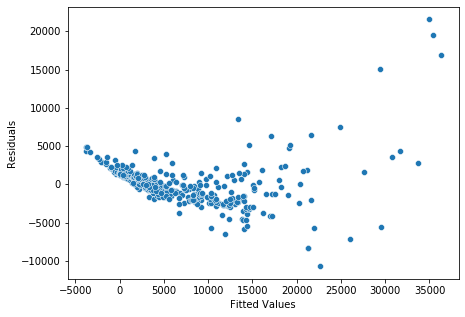

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
ax=sns.scatterplot(x=resDP.fittedvalues,y=resDP.resid)
ax.set(xlabel='Fitted Values',ylabel='Residuals')
plt.show()